### Ejercicio 1

In [1]:
import os
import seaborn
import sys
import matplotlib.pyplot as plt
import numpy as np
import math

# Carpeta que contenga a las funciones
sys.path.append('C:/Users/Portables/Desktop/Materias/Circu/Circulacion-General-FCEN/modulo_oceano')

from funciones.cargar_salida_QG import *
from funciones.calculosCBO import *
from funciones.laplaciano import *


In [2]:
# Directorios de salida para cada modelo
base_dir = 'C:/Users/Portables/Desktop/Materias/Circu/Practica 1'

dir_salidas = {
    "S1": f"{base_dir}/out_tmp_S1/",
    "S2": f"{base_dir}/out_tmp_S2/",
    "M1": f"{base_dir}/out_tmp_M1/",
    "M2": f"{base_dir}/out_tmp_M2/"
}

# Dimensiones del modelo
Lx, Ly = 4000, 2000  # Dimensiones de la cuenca en km
nx, ny = 200, 100    # Puntos de grilla

In [3]:
S1 = cargar(dir_salidas["S1"], 4000, 2000, 200, 100)
S2 = cargar(dir_salidas["S2"], 4000, 2000, 200, 100)
M1 = cargar(dir_salidas["M1"], 4000, 2000, 200, 100)
M2 = cargar(dir_salidas["M2"], 4000, 2000, 200, 100)

In [11]:
psi_S1 = S1[2]  
psi_S2 = S2[2]  
psi_M1 = M1[2]  
psi_M2 = M2[2]  

vort_S1 = S1[3] 
vort_S2 = S2[3] 
vort_M1 = M1[3] 
vort_M2 = M2[3] 

# Escalas típicas
tau = 0.25         
L = 4000000        
D = 2500           
beta = 2e-11       
rho = 1025         
K = 1.16e-7
Ef = K / (beta * L)

# Parámetros para la dimensionalización
U = (2 * math.pi * tau) / (rho * D * beta * L)  # Velocidad
Ro = (2 * math.pi * tau) / (rho * D * (math.pow(beta, 2) * math.pow(L, 3)))  # Número de Rossby

# Energía cinética
tke_S1 = S1[4][:, 3]  # La tercera columna tiene la Energía cinética total
tke_S2 = S2[4][:, 3]
tke_M1 = M1[4][:, 3]
tke_M2 = S2[4][:, 3]

# Dimensionalización de las variables
psi_S1_dim = psi_S1 * U * L
psi_S2_dim = psi_S2 * U * L
psi_M1_dim = psi_M1 * U * L
psi_M2_dim = psi_M2 * U * L

vort_S1_dim = vort_S1 * U / L
vort_S2_dim = vort_S2 * U / L
vort_M1_dim = vort_M1 * U / L
vort_M2_dim = vort_M2 * U / L

## Ejercicio 5

In [17]:
### Todo sacado de varios.py

modelos = ['S1', 'M1']
for modelo in modelos:
    dir_salida = dir_salidas[modelo]
    
    datos_modelo = cargar(dir_salida, 4000, 2000, 200, 100)
    psiadim = datos_modelo[2]
    vortadim = datos_modelo[3]
    QG_curlw = datos_modelo[5]

    # Dimensionalización de las variables
    psidim = psiadim * U * L
    vortdim = vortadim * U / L
    Ev1 = 0.005

    # Transporte meridional promediado en la vertical (derivada zonal de la función corriente multiplicada por la profundidad)
    trans_mer = np.diff(psiadim, n=1, axis=1) * D

    # Términos ecuación de Stommel
    ds = 0.1
    ter1 = np.diff(psiadim, n=1, axis=1)
    ter1_LatCent = np.squeeze(ter1[int(np.size(ter1, 0) / 2), :]) / ds

    ter2 = -QG_curlw[int(np.size(ter1, 0) / 2), 1:(nx + 1)]
    ter3 = Ef * vortadim[int(np.size(ter1, 0) / 2), :]

    # Términos ecuación Munk
    term1 = np.diff(psiadim, n=1, axis=1)[int(np.size(psiadim, 0) / 2), :] / ds
    term2 = -QG_curlw[int(np.size(QG_curlw, 0) / 2), 1:-1]
    term3 = -Ev1 * Calc_del2(vortadim, ds)[int(np.size(vortadim, 0) / 2), :]

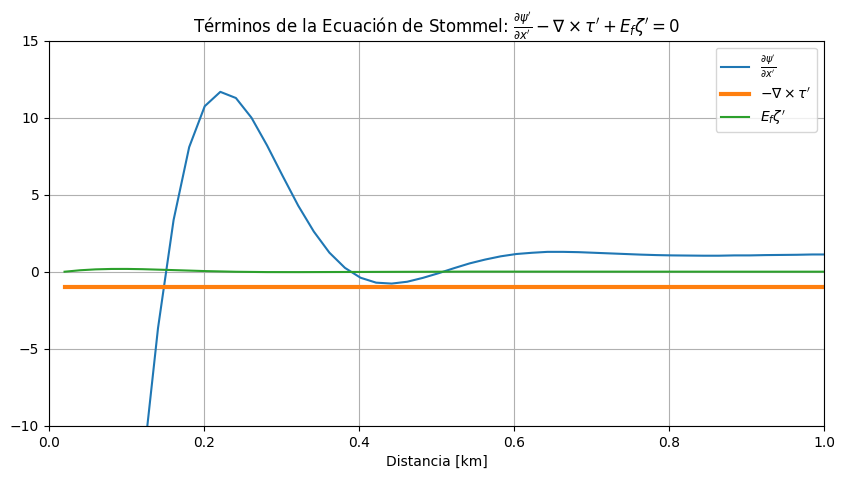

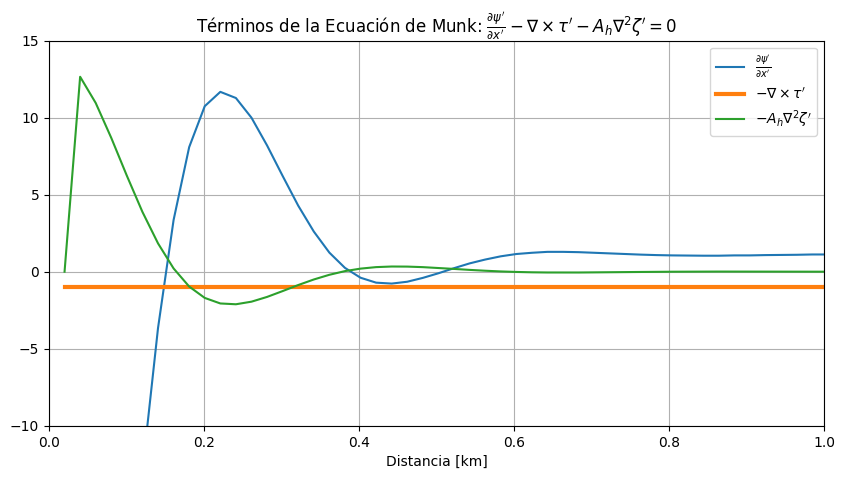

In [18]:
# Variables correspondientes al modelo S1 (Stommel 1)
X_S1_final = datos_modelo[6][1:-1]  # Ajustar para que coincida con los términos derivados
min_length_s1 = min(len(X_S1_final), len(ter1_LatCent), len(ter2), len(ter3))
X_S1_final = X_S1_final[:min_length_s1]
ter1_LatCent = ter1_LatCent[:min_length_s1]
ter2 = ter2[:min_length_s1]
ter3 = ter3[:min_length_s1]

# Graficar los términos para la ecuación de Stommel en S1
plt.figure(figsize=(10, 5))
plt.plot(X_S1_final / 1000, ter1_LatCent, label=r"$\frac{\partial \psi'}{\partial x'}$")
plt.plot(X_S1_final / 1000, ter2, label=r"$-\nabla \times \tau'$", linewidth=3)
plt.plot(X_S1_final / 1000, ter3, label=r"$E_f \zeta'$")
plt.legend()
plt.title(r"Términos de la Ecuación de Stommel: $\frac{\partial \psi'}{\partial x'} - \nabla \times \tau' + E_f \zeta' = 0$")
plt.grid()
plt.xlabel("Distancia [km]")
plt.xlim([0, 1])
plt.ylim([-10, 15])
plt.show()

# Variables correspondientes al modelo M1 (Munk 1)
X_M1_final = datos_modelo[6][1:-1]  # Ajustar para que coincida con los términos derivados
min_length_m1 = min(len(X_M1_final), len(term1), len(term2), len(term3))
X_M1_final = X_M1_final[:min_length_m1]
term1 = term1[:min_length_m1]
term2 = term2[:min_length_m1]
term3 = term3[:min_length_m1]

# Graficar los términos para la ecuación de Munk en M1
plt.figure(figsize=(10, 5))
plt.plot(X_M1_final / 1000, term1, label=r"$\frac{\partial \psi'}{\partial x'}$")
plt.plot(X_M1_final / 1000, term2, label=r"$-\nabla \times \tau'$", linewidth=3)
plt.plot(X_M1_final / 1000, term3, label=r"$-A_h \nabla^2 \zeta'$")
plt.legend()
plt.title(r"Términos de la Ecuación de Munk: $\frac{\partial \psi'}{\partial x'} - \nabla \times \tau' - A_h \nabla^2 \zeta' = 0}$")
plt.grid()
plt.xlabel("Distancia [km]")
plt.xlim([0, 1])
plt.ylim([-10, 15])
plt.show()


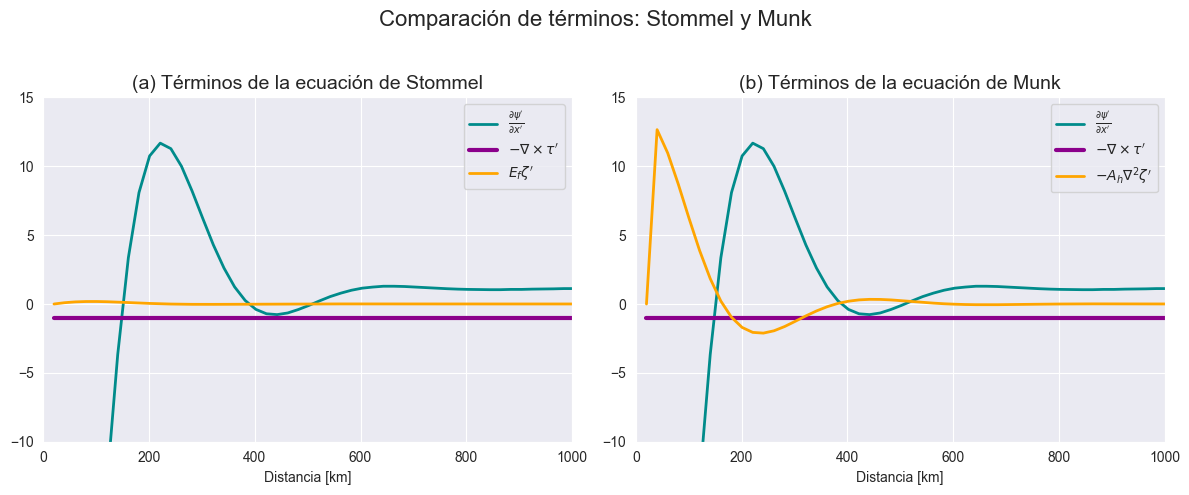

In [26]:
sns.set_style("darkgrid")
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas, tamaño de la figura
fig.suptitle('Comparación de términos: Stommel y Munk', fontsize=16)  # Título común para los subplots

# Primer subplot: Términos de la ecuación de Stommel
axs[0].plot(X_S1_final, ter1_LatCent, label=r"$\frac{\partial \psi'}{\partial x'}$", color='darkcyan', linewidth=2)
axs[0].plot(X_S1_final, ter2, label=r"$-\nabla \times \tau'$", color='darkmagenta', linewidth=3)
axs[0].plot(X_S1_final, ter3, label=r"$E_f \zeta'$", color='orange', linewidth=2)
axs[0].set_title('(a) Términos de la ecuación de Stommel', fontsize=14)
axs[0].set_xlabel("Distancia [km]")
axs[0].set_xlim([0, 1000])
axs[0].set_ylim([-10, 15])
axs[0].legend()
axs[0].grid(True)

# Segundo subplot: Términos de la ecuación de Munk
axs[1].plot(X_M1_final, term1, label=r"$\frac{\partial \psi'}{\partial x'}$", color='darkcyan', linewidth=2)
axs[1].plot(X_M1_final, term2, label=r"$-\nabla \times \tau'$", color='darkmagenta', linewidth=3)
axs[1].plot(X_M1_final, term3, label=r"$-A_h \nabla^2 \zeta'$", color='orange', linewidth=2)
axs[1].set_title('(b) Términos de la ecuación de Munk', fontsize=14)
axs[1].set_xlabel("Distancia [km]")
axs[1].set_xlim([0, 1000])
axs[1].set_ylim([-10, 15])
axs[1].legend()
axs[1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
